In [18]:
import pathlib
import missingno
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/food_coded.csv')
x = pd.DataFrame(df.isna().sum())
col = x[x[0] != 0].index
df = df[df.isnull().any(axis=1)].loc[:, col]

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/andymcdgeo/Andys_YouTube_Notebooks/main/Data/xeek_subset2.csv')

<font color = 'yellow'><b>
Get Columns where missing values > N%

In [51]:
# get columns where missing values are more than x%
missing_per = round(df.isnull().mean() * 100, 2) 
missing_col = missing_per[missing_per > 50].index
missing_col
# drop this columns 'missing_col'

Index(['RSHA', 'SGR', 'DTS', 'DCAL', 'ROPA', 'RXO'], dtype='object')

In [56]:
missing_per.sort_values(ascending=False)

DTS            90.85
ROPA           89.88
SGR            86.97
RXO            70.76
DCAL           57.81
RSHA           53.42
NPHI           31.14
SP             29.67
PEF            24.29
DRHO           20.77
RHOB           18.88
FORMATION      16.19
RMED            5.74
RDEP            5.55
Z_LOC           5.55
Y_LOC           5.55
X_LOC           5.55
DTC             0.42
CALI            0.14
LITH_CONF       0.01
LITHOFACIES     0.00
WELL            0.00
DEPTH_MD        0.00
GROUP           0.00
GR              0.00
dtype: float64

<font color = 'yellow'><b>
Get Rows where missing values > N%

In [52]:
# get row where missing values > 50%
missing_row = round(df.isnull().mean(axis=1) * 100, 2)
row_index = missing_row[missing_row > 50].index
row_index
# now drop rows having index 'row_index' 

Index([108350, 108351, 108352, 108353, 108354, 108355, 108356, 108357, 108358,
       108359,
       ...
       112464, 123164, 123165, 123166, 123167, 123168, 123169, 123170, 123171,
       123172],
      dtype='int64', length=4124)

<Font color = 'yellow'>

Here the white strips represeting missing values, and right hand side there is one vertical line chart whose interpretation is bit confusing like it represent no. of not null values. It also show minimum (23) and maximum (34) not null values and using this plot we can also get conclusion about minimum and maximum count of null values like 23 is minimum count of not null values means 34-23 = 11 null values means maximum 11 column have null value. 

<Axes: >

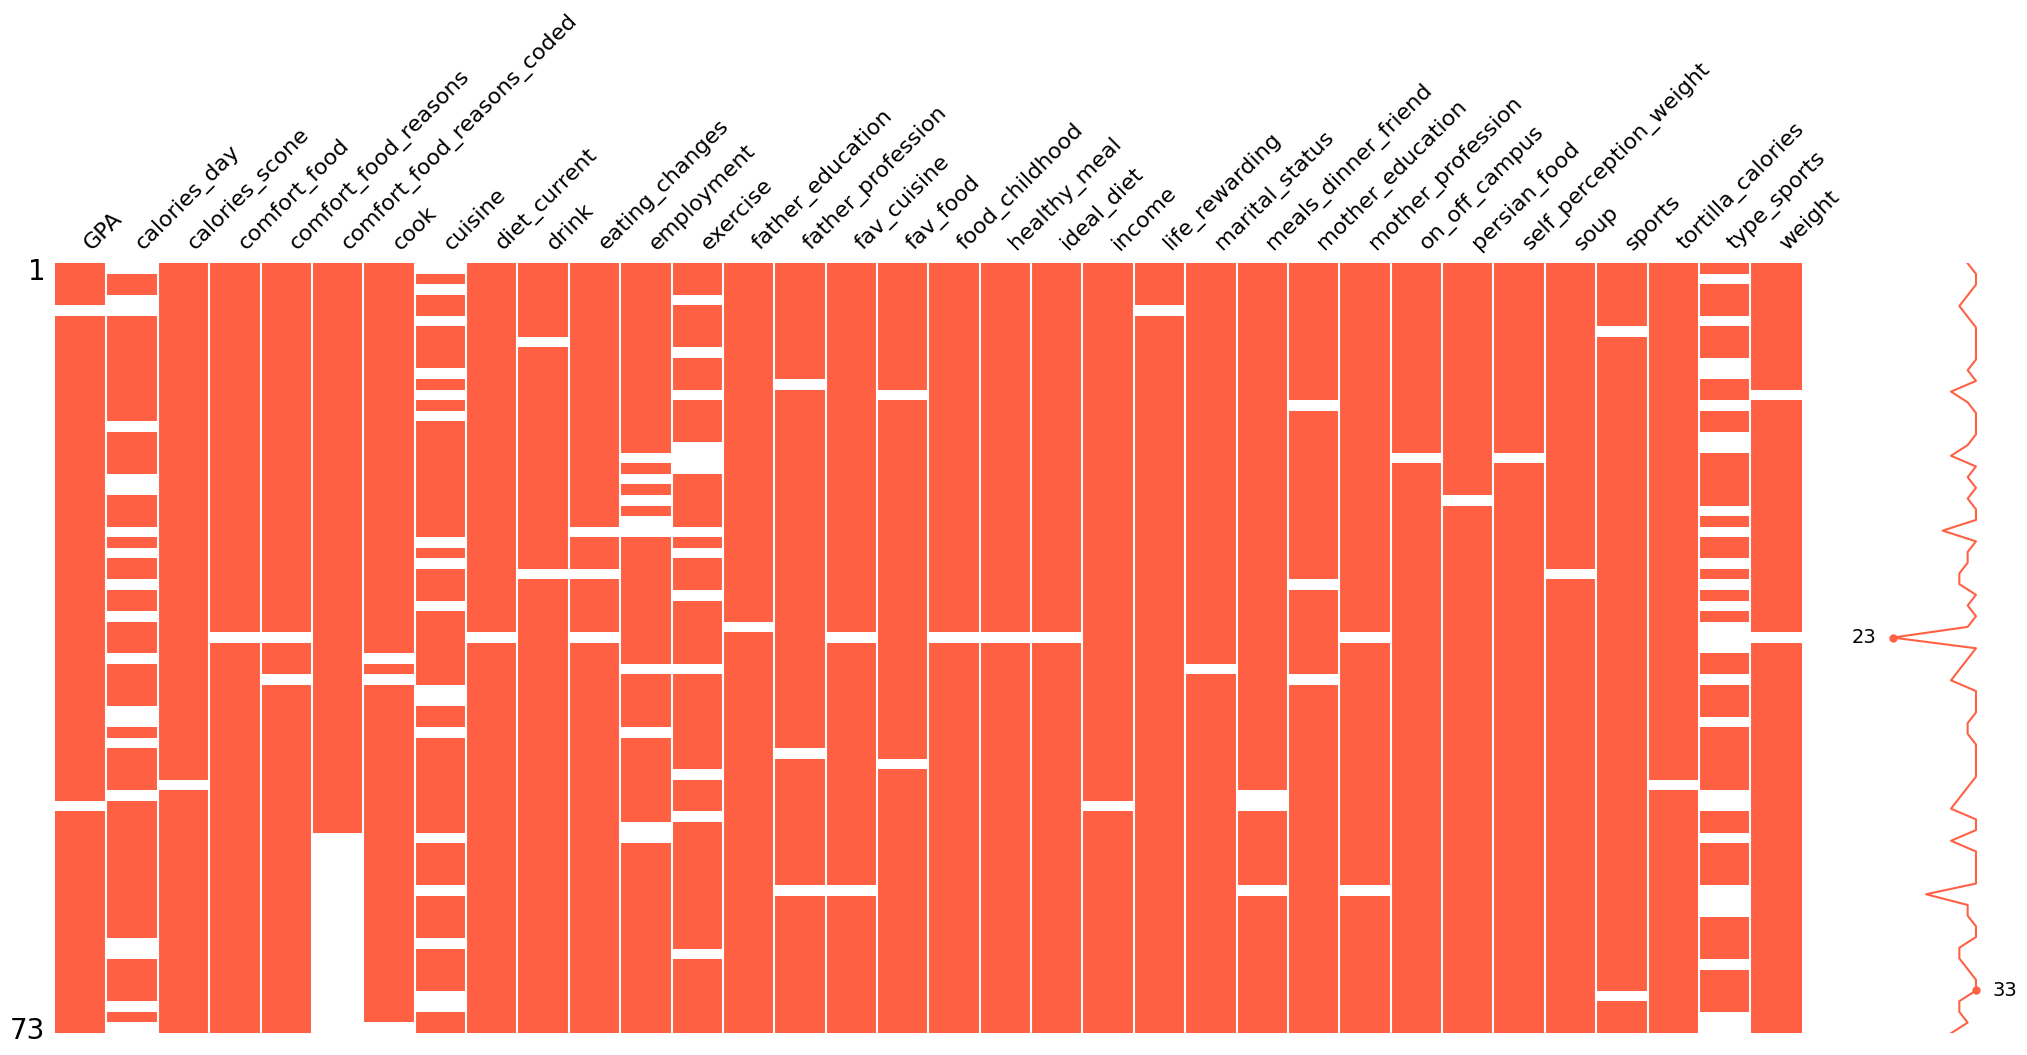

In [30]:
missingno.matrix(df, color=(1, 0.38, 0.27))

<Font color = 'yellow'>
This bars representing no. of not null values

<Axes: >

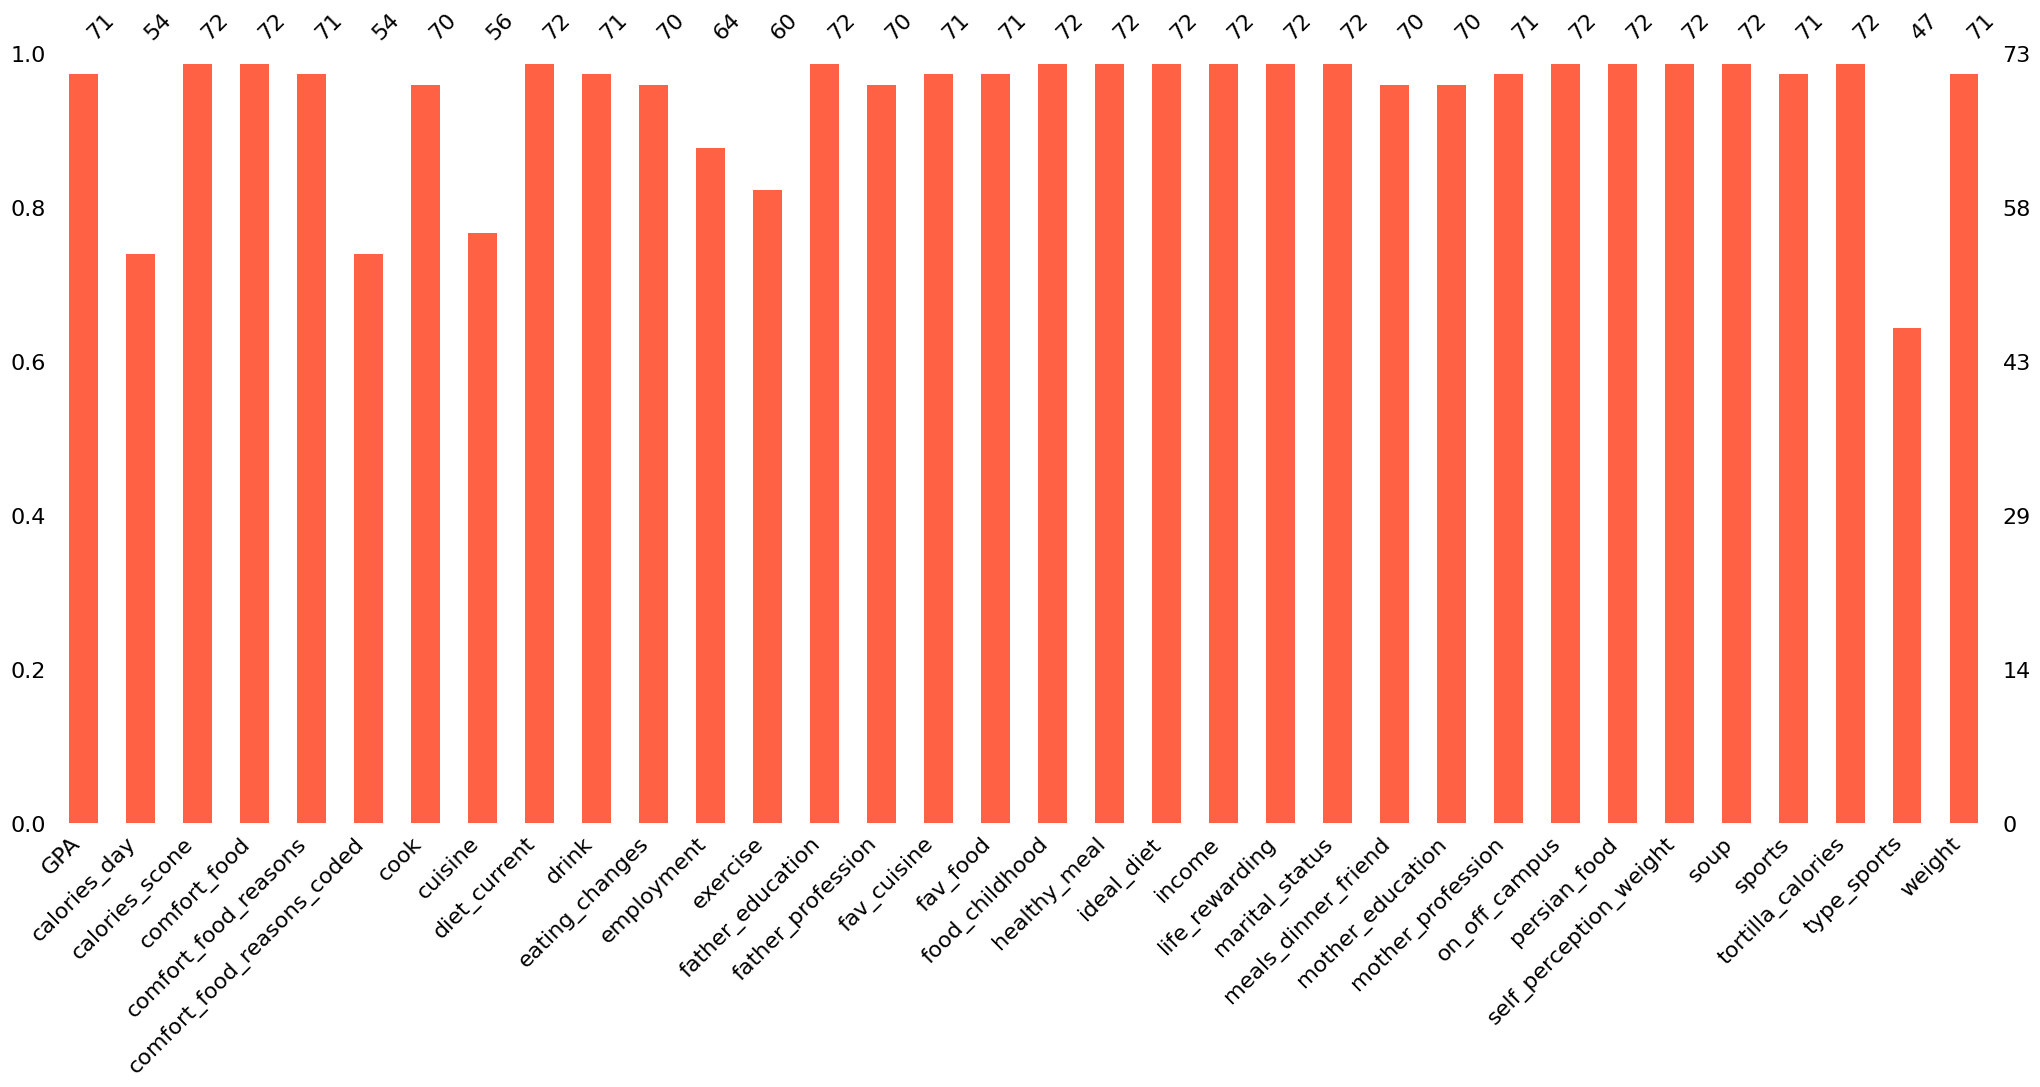

In [31]:
missingno.bar(df, color=(1, 0.38, 0.27))

<Font color = 'yellow'>
The Heatmap showing the co-relation between the NULL values.
 
- +1 means whenever col_A is NULL, col_B is also NULL.
- -1 means whenever col_A is NULL, col_B is not NULL
- 0 means no relation

<Axes: >

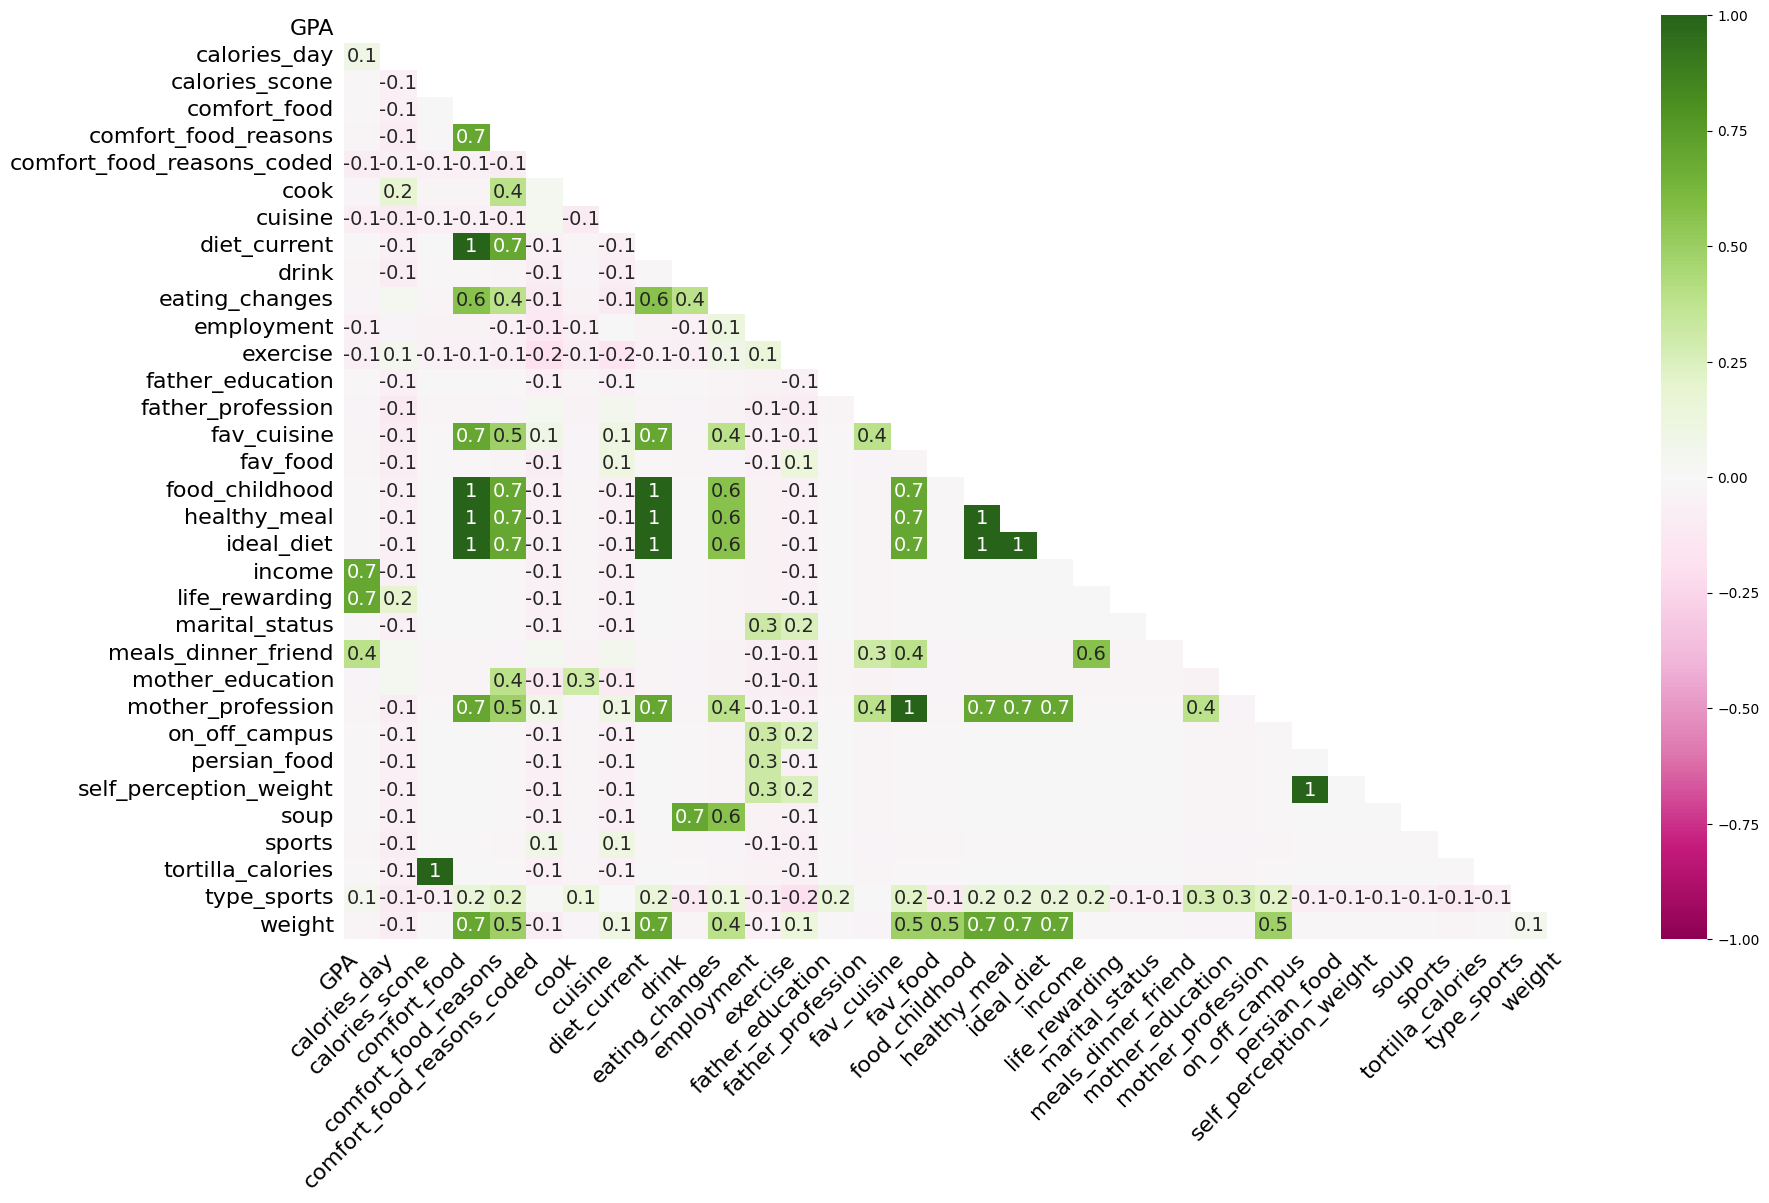

In [41]:
missingno.heatmap(df, cmap='PiYG')

<Font color = 'yellow'>
The dendrogram groups columns into clusters based on how their missing values correlate with each other (Not that much useful).

<Axes: >

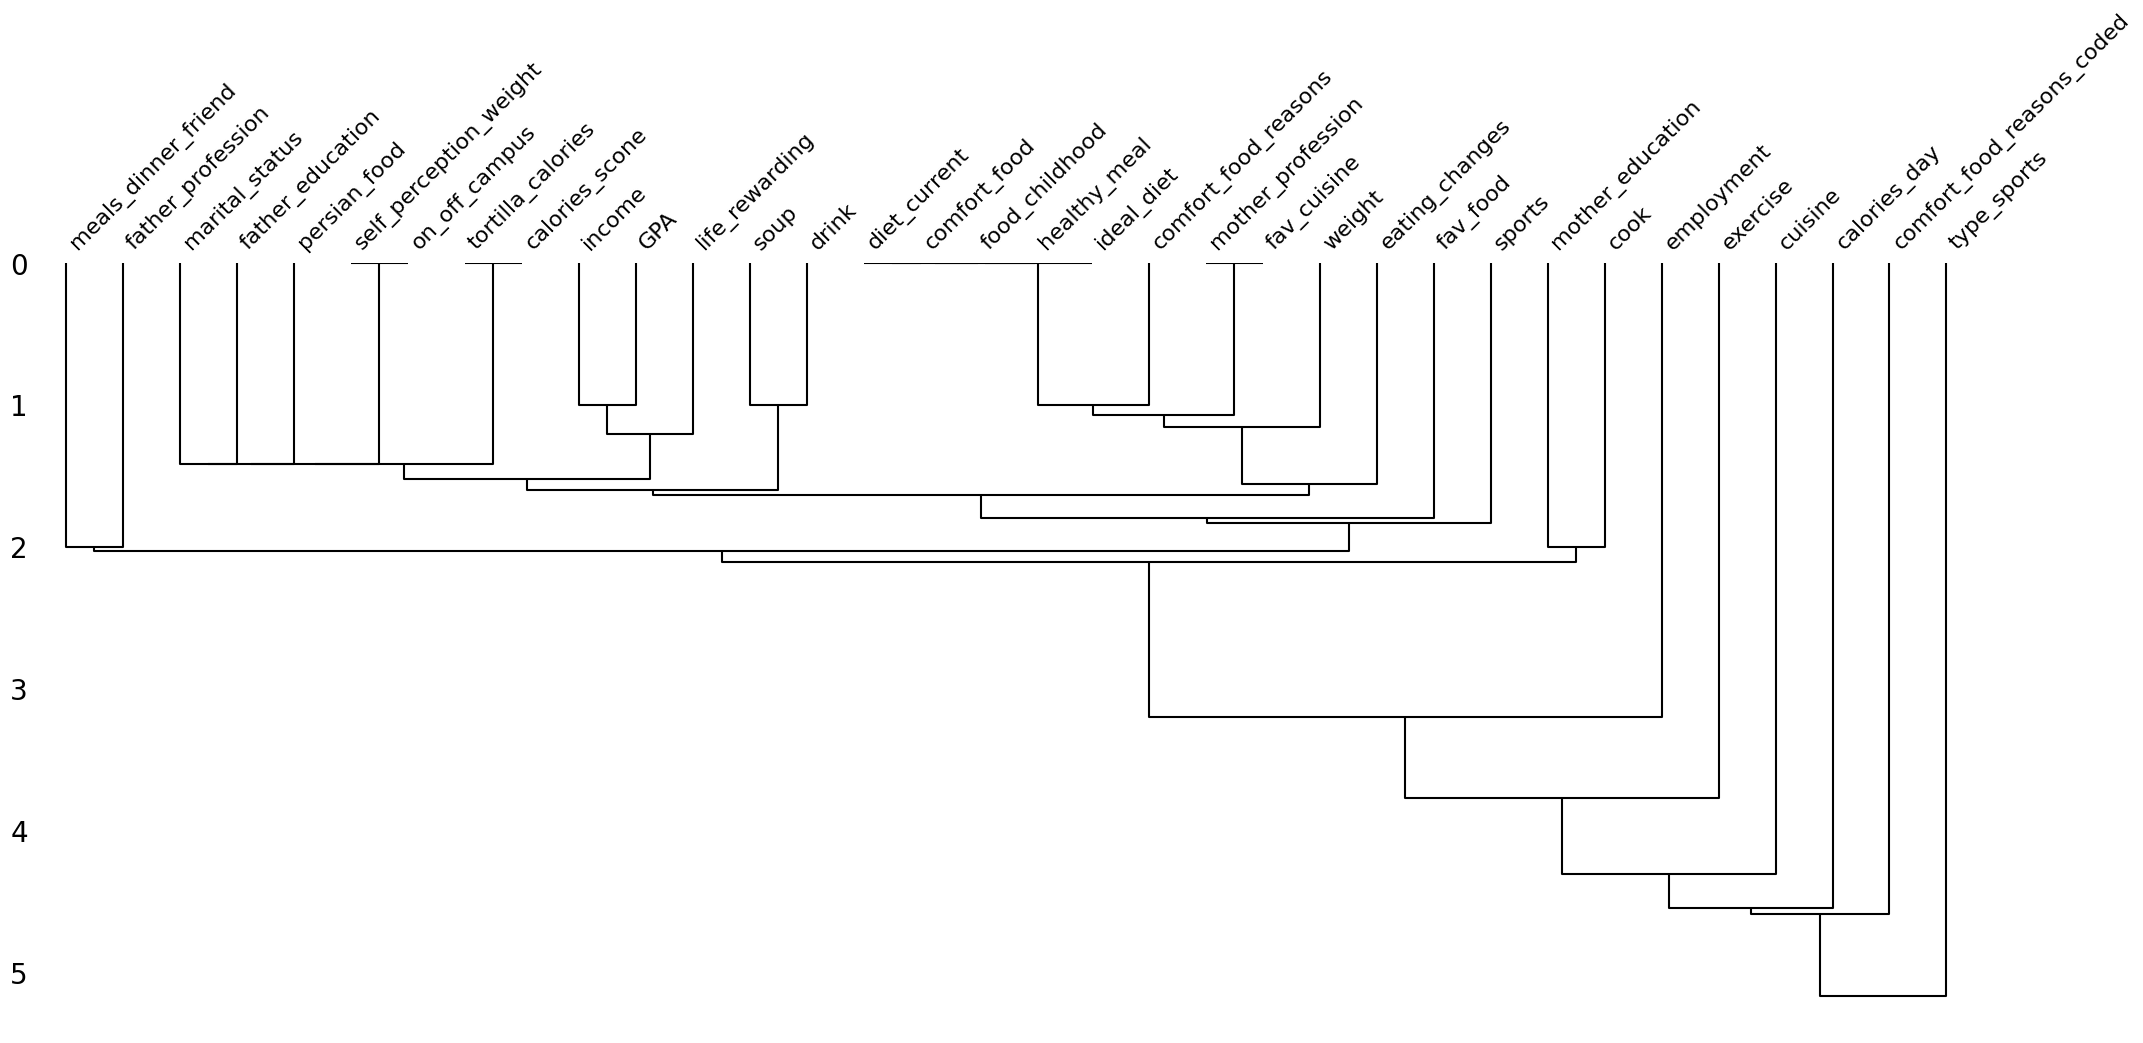

In [36]:

missingno.dendrogram(df, orientation='bottom')

<font color = 'yellow'>

<b>Imp terminologies:</b>

<b>Observed Data:</b> Not-NULL Values

<b>Unobserved Data:</b> NULL Values

<b>Types of Missing Values :</b>

- <b>MCAR (Missing Completely at Random):</b> Completely missing at random, missing values not depended on any observed data as well as unobserved data.

- <b>MAR (Missing at Random):</b> Missing values dependent on observed data but not on unobserved data

- <b>MNAR (Missing Not at Random):</b> Missing values dependent on unobserved data and itself.


<font color = 'orange'>
<b>MCAR Detection Technique</b>

- <b>Technique 1</b>
    - Lets take Feature f1, now create 2 groups. In one group all f1 values are NULL, and remaining all Not NULL values of f1.
    - Now take mean/PDF (numerical feat.)/PMF (cat. feat.) of all the columns of both the groups.
    - Now compare mean of all features (excluding f1), if mean is same, means missing values are completly random else there is some dependency.  

- <b>Technique 2</b>
    - We can use T-Test Independent and check the dependency.

<b>MAR Detection Technique</b>

- <b>Technique 1</b>
    - Let's take Feat f1, now encode f1 like NULL to 1 and Not NULL to 0. 
    - Remaining all columns will act as independent feature (training data) [all should be not NULL], now train logistic reg model and check classification report, if accuracy ~1 means there is dependency. Use model.coef_, it will tell on which feature its mostly dependent. 

- <b>Technique 2</b>
    - Similar as Technique 1 of MCAR, distribution plot bna k compare karo. If dist changes means there is dependency.

<b>MNAR Detection Technique</b>
- This technique is very difficult to detect, therefore if neither MCAR nor MAR then its MNAR.


<font color = 'cyan'>
<b>Hypothesis Testing</b>

It is statistical technique used to make inference. It allow us to make probabilistic statement about the population parameter based on sample data and we check whatever the data (sample data) at our hand, sufficiently support particular hypothesis.

In hyp testing we geather evidence to either reject or fail to reject NULL hypothesis.

- Null Hypothesis (H0) - Statement that assume there is no significant effect or relationship b/w the variables being studied (old & new value).
- Alternative Hypo (H1) - Statement that assume there is significant effect (here we challenge the NULL hypothesis).

<b>Note:</b> Failing to reject the NULL hypothesis doesn't necessary means that NULL hypothesis is true. It just means that there isn't enough evidence to support the alternate hypothesis.

<font color = 'orange'>
<b>Independent T-Test Technique</b>
It compare the means of two separate groups to see if they are significantly different from each other.

<b>Key assumptions:</b>

- Data should be normally distributed (or close to it).
- Variances of the groups should be equal (or close to it).

<b>Result:</b>

- If the p-value < certain significance level (usually 0.05), we reject the null hypothesis. Results are statistically significant (not a coincidence).
- If the p-value > significance level, we fail to reject the null hypothesis. Results are not statistically significant (might be a coincidence).

In [46]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data
data = np.random.randn(10000, 3)  # 100 rows, 3 columns

# Artificially introduce missing values completely at random in the first column
missing_indices = np.random.choice(np.arange(10000), size=1000, replace=False)
data[missing_indices, 0] = np.nan

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

df.sample(3)

,Feature1,Feature2,Feature3
9727,1.590464,-0.175974,2.047827
5188,1.924838,0.286016,-0.849023
3603,0.508012,-0.713192,0.226304


In [47]:
missing = df[df['Feature1'].isnull()]
non_missing = df[~df['Feature1'].isnull()]

In [48]:
import numpy as np
from scipy import stats

# Compare means of another feature 'feature2' between groups
t_stat, p_val = stats.ttest_ind(missing['Feature2'], non_missing['Feature2'], nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -0.8541951155885723, P-value: 0.3930173550001367


<b>t_stat Conclusion</b>

t-statistic help us to understand the magnitude and direction of the difference, while the p-value helps you determine whether the difference is due to chance or not.
- t_stat < 0 : Mean of missing (group-1) is less than mean of non-missing (group-2)
- t_stat = 0 : No difference b/w mean
- t_stas > 0 : Mean of missing (group-1) is greater than mean of non-missing (group-2)

In [64]:
import math

print('Feature-2')
print('Missing Mean: ', missing['Feature2'].mean())
print('Non-Missing Mean: ', non_missing['Feature2'].mean())
print('Missing STD: ', missing['Feature2'].std())
print('Non Missing STD: ', non_missing['Feature2'].std())

x = (missing['Feature2'].mean() - non_missing['Feature2'].mean()) / math.sqrt(((missing['Feature2'].std() ** 2 )/100) + ((non_missing['Feature2'].std() ** 2 )/100))
print('t_stat: ', x)

Feature-2
Missing Mean:  -0.022941729950557536
Non-Missing Mean:  0.0055132020496924065
Missing STD:  0.9877215488321573
Non Missing STD:  1.0006430524485384
t_stat:  -0.2023798906429688


<b>Keep in mind that this doesn't mean there's no difference between the mean, results might be coincidence.
We don't have enough evidence to say that the results are statistically significant.

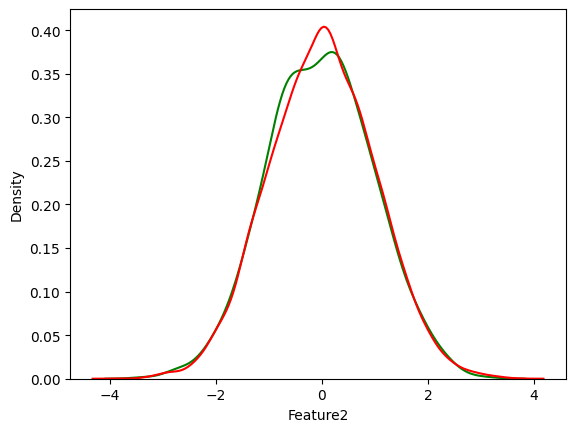

In [55]:
import matplotlib.pyplot as plt

sns.kdeplot(data=missing, x='Feature2', color='green')
sns.kdeplot(data=non_missing, x='Feature2', color='red')
plt.show()

# mean and variance are very close

<font color = '1abc9c'>
<b>KNN Imputer</b>

In [70]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')[['Age','Pclass','Fare','Survived']]

In [73]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [77]:
X.isnull().sum()

Age       177
Pclass      0
Fare        0
dtype: int64

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

knn = KNNImputer(n_neighbors=3)
X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

<font color = '1abc9c'>
<b>Iterative Imputer</b>

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [160]:
np.set_printoptions(suppress=True, precision=2)

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
f2 = np.random.randn(n_samples)  # Feature 2: Normal distribution
f3 = np.random.rand(n_samples) * 100  # Feature 3: Uniform distribution between 0 and 100

# Generate Feature 1 with a dependency on Feature 2 for missingness
f1 = np.random.randn(n_samples) * 50  # Initial Feature 1: Normal distribution, scaled
temp = f1.copy()
# Introduce missing values in f1 based on f2; higher values of f2 are more likely to result in missing f1 values
missing_probability = (f2 - f2.min()) / (f2.max() - f2.min())  # Normalize f2 to get probabilities
f1[missing_probability > 0.7] = np.nan  # Set f1 to NaN where missing_probability > 0.8

# Create DataFrame
df = pd.DataFrame({'Feature1': f1, 'Feature2': f2, 'Feature3': f3})

In [161]:
# missing_probability[missing_probability > 0.7]
indx = df[df['Feature1'].isnull()].index

In [162]:
temp[indx]

array([-35.96, -21.82, -14.77, 111.57,  13.46, -32.69,   4.48,  53.51,
         0.06,   3.  ,  53.01,  -1.28,  48.27,  30.16, -55.57,  79.03,
         7.59,   0.34,  74.21,  17.78, -44.94,  34.01, -12.58, -43.14,
        61.79, -46.48, -36.09,  40.57,  -6.57,  87.48, -61.88,  72.18,
       -62.93,  51.07,  19.48,  26.73,  44.85,  15.57,  45.11,  42.73,
       -44.75,  42.41,  29.1 ,  71.57,  44.26,  61.54,  -7.54, -60.16])

In [177]:
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0), max_iter=30, random_state=0)
X_train_imputed = imputer.fit_transform(df)

In [178]:
a = pd.DataFrame({'non-missing': temp, 'missing': f1, 'pred': X_train_imputed[:, 0]})
a[a.isnull().any(axis=1)]

,non-missing,missing,pred
31,-35.96,NaN,-0.75
106,-21.82,NaN,-8.37
113,-14.77,NaN,25.03
125,111.57,NaN,8.93
156,13.46,NaN,25.03
167,-32.69,NaN,-12.58
179,4.48,NaN,-9.36
209,53.51,NaN,-1.61
220,0.06,NaN,-10.55
234,3.00,NaN,-10.84


In [188]:
knn = KNNImputer(n_neighbors=3)
xx_trnsformed = knn.fit_transform(df)

a = pd.DataFrame({'non-missing': temp, 'missing': f1, 'pred': xx_trnsformed[:, 0]})
a[a.isnull().any(axis=1)]

,non-missing,missing,pred
31,-35.96,NaN,32.98
106,-21.82,NaN,-31.89
113,-14.77,NaN,-12.07
125,111.57,NaN,3.93
156,13.46,NaN,13.36
167,-32.69,NaN,-14.38
179,4.48,NaN,-30.45
209,53.51,NaN,2.14
220,0.06,NaN,-2.89
234,3.00,NaN,0.09


In [196]:
import miceforest as mf

# Create kernel. 
kds = mf.ImputationKernel(
  df,
  random_state=1991
)

# Run the MICE algorithm for 2 iterations
kds.mice(50)

# Return the completed dataset.
iris_complete = kds.complete_data()

In [197]:
a = pd.DataFrame({'non-missing': temp, 'missing': f1, 'pred': iris_complete['Feature1']})
a[a.isnull().any(axis=1)]

,non-missing,missing,pred
31,-35.96,NaN,48.47
106,-21.82,NaN,-79.06
113,-14.77,NaN,7.76
125,111.57,NaN,-0.33
156,13.46,NaN,86.94
167,-32.69,NaN,-54.36
179,4.48,NaN,6.18
209,53.51,NaN,-12.35
220,0.06,NaN,-54.36
234,3.00,NaN,30.85
